<a href="https://colab.research.google.com/github/Muhaiminul-Kabir/My-codes/blob/main/Driver%20segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GPU info

In [401]:
!nvidia-smi

Thu Nov 30 12:46:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    31W /  70W |   1451MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Drive Mount

In [402]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#OS

In [403]:
import os
HOME = os.getcwd()
HOME

'/content'

#Installing Ultralytics

In [404]:
!pip install ultralytics
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 395, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://d

#Path set

In [405]:
from ultralytics import YOLO
from IPython.display import display, Image

In [547]:
path = '/content/drive/MyDrive/DATASET/imbalanced dataset/looking left/93.jpg'
name = '93.png'
j+=1
ppath = f'/content/runs/detect/predict{j}/{name}'


#Segmentation of vehicles

In [548]:
model = YOLO(f'{HOME}/yolov8x-seg.pt')
results = model.predict(source = path, save=True, save_txt=True,classes=[2,7])


image 1/1 /content/drive/MyDrive/DATASET/imbalanced dataset/looking left/93.jpg: 480x640 5 cars, 1 truck, 85.1ms
Speed: 2.7ms preprocess, 85.1ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict2
1 label saved to runs/segment/predict2/labels


In [549]:
result = results[0]


In [550]:
len(result.masks)

6

In [551]:
seg = result.masks[0]

#Croping the biggest segment of vehicle

In [552]:
vehicle_seg_pts = []
seg_pts = []

for i in result.masks:
  print(len(i.xy[0]))
  seg_pts.append(len(i.xy[0]))

maxw = max(seg_pts)


for i in result.masks:

  if len(i.xy[0]) == maxw:
    vehicle_seg_pts.append(i.xy[0])

print(vehicle_seg_pts)


24
90
39
66
290
299
[array([[     1710.9,      256.74],
       [     1707.2,      260.46],
       [     1699.8,      260.46],
       [       1696,      264.18],
       [     1692.3,      264.18],
       [     1692.3,       267.9],
       [     1666.3,      293.95],
       [     1662.5,      293.95],
       [     1640.2,      316.27],
       [     1632.8,      316.27],
       [     1629.1,      319.99],
       [     1625.3,      319.99],
       [     1617.9,      327.43],
       [     1614.2,      327.43],
       [     1610.5,      331.15],
       [     1595.6,      331.15],
       [     1591.9,      334.88],
       [     1569.5,      334.88],
       [     1565.8,       338.6],
       [     1532.3,       338.6],
       [     1528.6,      342.32],
       [     1517.4,      342.32],
       [     1513.7,      346.04],
       [       1510,      346.04],
       [     1506.3,      349.76],
       [     1450.5,      349.76],
       [     1446.7,      346.04],
       [     1394.6,      346.04],

In [553]:
import cv2 as cv
import matplotlib.pyplot as plt
import math
import numpy as np
from PIL import Image

[[     1696.7           0]
 [       1693      3.7208]
 [     1685.5      3.7208]
 [     1681.8      7.4417]
 [     1678.1      7.4417]
 [     1678.1      11.163]
 [     1652.1      37.208]
 [     1648.3      37.208]
 [       1626      59.533]
 [     1618.6      59.533]
 [     1614.8      63.254]
 [     1611.1      63.254]
 [     1603.7      70.696]
 [       1600      70.696]
 [     1596.2      74.417]
 [     1581.4      74.417]
 [     1577.6      78.138]
 [     1555.3      78.138]
 [     1551.6      81.858]
 [     1518.1      81.858]
 [     1514.4      85.579]
 [     1503.2      85.579]
 [     1499.5        89.3]
 [     1495.8        89.3]
 [     1492.1      93.021]
 [     1436.2      93.021]
 [     1432.5        89.3]
 [     1380.4        89.3]
 [     1376.7      85.579]
 [     1257.6      85.579]
 [     1253.9      81.858]
 [     1227.9      81.858]
 [     1224.2      78.138]
 [       1213      78.138]
 [     1209.3      74.417]
 [     1201.8      74.417]
 [     1198.1      70.696]
 

True

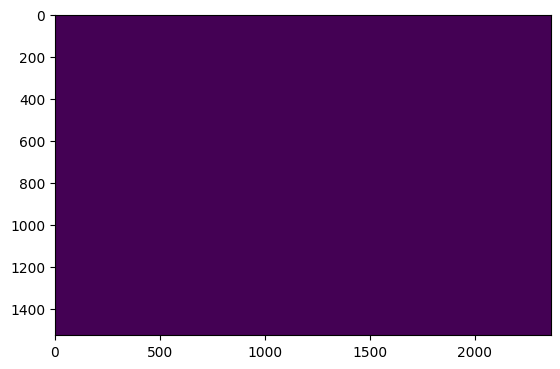

In [565]:
img  = cv.imread(path)



pts = np.array(vehicle_seg_pts[0])

## (1) Crop the bounding rect
rect = cv.boundingRect(pts)
x,y,w,h = rect
croped = img[y:y+h, x:x+w].copy()
plt.imshow(croped)
## (2) make mask
pts = pts - pts.min(axis=0)

cv.imwrite("/content/croped.png", croped)
np.ceil(pts)
print(pts)
mask = np.zeros(croped.shape[:2], np.uint8)
plt.imshow(mask)
cv.drawContours(mask, [pts.astype(int)], -1, (255, 255, 255), -1, cv.LINE_AA)

## (3) do bit-op
dst = cv.bitwise_and(croped, croped, mask=mask)

## (4) add the white background
bg = np.ones_like(croped, np.uint8)*255
cv.bitwise_not(bg,bg, mask=mask)
dst2 = bg+ dst


cv.imwrite("/content/dst2.png", dst2)


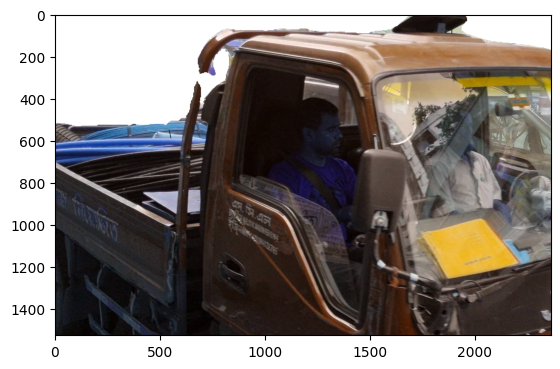

In [566]:
npath = "/content/dst2.png"
img = cv.imread(npath)
plt.imshow(img)


#Detecting person/driver

In [567]:
results1 = model.predict(source = '/content/dst.png', save=True, save_txt=True,classes=[0])


image 1/1 /content/dst.png: 416x640 2 persons, 85.1ms
Speed: 3.7ms preprocess, 85.1ms inference, 3.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/segment/predict2
2 labels saved to runs/segment/predict2/labels


In [568]:
result2 = results1[0]


In [1]:
len(result2.boxes)


NameError: ignored

In [570]:
person_cords = []
person_a = []

for i in result2.boxes:
  print(i.xyxy.tolist())
  _,_,w,h = i.xywh[0].tolist()
  _,_,_,y2 = i.xyxy[0].tolist()

  if y2 < vehicle_y2:
     person_a.append(w*h)
print(f'jdks {person_a}')
maxw = max(person_a)


for i in result2.boxes:
  print(i.xyxy.tolist())
  _,_,w,h = i.xywh[0].tolist()
  if w*h == maxw:
    person_cords.append(i.xyxy[0].tolist())

print(person_cords)

x1,y1,x2,y2 = person_cords[0]

x1 = math.floor(x1)
y1 = math.floor(y1)
x2 = math.ceil(x2)
y2 = math.ceil(y2)


[[1744.197509765625, 452.0146789550781, 2178.76318359375, 1005.8751831054688]]
[[1005.6249389648438, 396.44146728515625, 1448.2545166015625, 1064.749755859375]]
jdks [240688.74993100762, 295813.0155027248]
[[1744.197509765625, 452.0146789550781, 2178.76318359375, 1005.8751831054688]]
[[1005.6249389648438, 396.44146728515625, 1448.2545166015625, 1064.749755859375]]
[[1005.6249389648438, 396.44146728515625, 1448.2545166015625, 1064.749755859375]]


1065
(1527, 2363, 3)


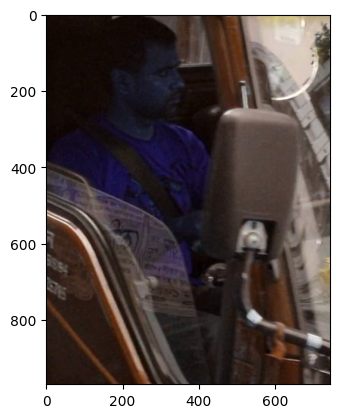

In [571]:
img  = cv.imread(npath)
print(y2)
if y2 < 2000:
  y2 += 300
if x2 < 2000:
  x2 += 300
print(img.shape)
img = img[y1:y2,x1:x2]

plt.imshow(img)
#cv.imwrite(npath,img)